In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import db
import pam
import utils as ut
import features as ft
import dtw
import clustering_evaluation as ce
import seq2seq as s2s
from scipy.spatial.distance import euclidean,cityblock
import time

from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import matplotlib.cm as cm
from sklearn.decomposition import PCA

In [2]:
DATA_PATH = "data/grl/"
DATA_BASE = DATA_PATH + "grl.sqlite"
SAVE_PATH = DATA_PATH + "generated_data/"
FRAME_PATH = DATA_PATH + "grl.png"
VIDEO_PATH = DATA_PATH + "grl.MOV"
HOMOGRAPHY = DATA_PATH + "homography.txt"
DISTANCES = SAVE_PATH + "distances/cityblock_50.txt"

In [3]:
trajectories_po,ids_po,nb_objects = db.get_trajectories_by_object(DATA_BASE)
nb_trajectories_per_object_unsup = 1
trajectories_po_unsup,ids_po_unsup = db.filter_trajectories(nb_trajectories_per_object_unsup, trajectories_po, ids_po)

#total number of selected trajectories
nb_trajectories_unsup = nb_trajectories_per_object_unsup * nb_objects

# list of every selected trajectory, 
trajectories_unsup = np.array([t for o in trajectories_po_unsup for t in o])
# ids of every selected trajectory
ids_unsup = [i for o in ids_po_unsup for i in o]
# trajectories in pixel space, for displaying purposes only
pixel_trajectories_unsup = np.array([ut.to_pixel(t,HOMOGRAPHY) for t in trajectories_unsup])

In [4]:
ids = np.loadtxt(SAVE_PATH + "ids.txt")

In [5]:
ids = [int(i) for i in ids]

In [6]:
trajectories = trajectories_unsup[ids]
pixel_trajectories = pixel_trajectories_unsup[ids]

In [7]:
start = time.time()
features = [ft.compute_features(trajectory) for trajectory in trajectories]
features,_ = ft.standardize_features(features)
features = pd.DataFrame(features)
print("execution duration: " + str(time.time()-start))

execution duration: 50.9036881924


In [8]:
pca = PCA(n_components=0.999)
features = pca.fit_transform(features)
pca.n_components_

32

In [9]:
nb_clusters = 14
clusters = KMeans(n_clusters=nb_clusters, random_state = 0).fit_predict(features)

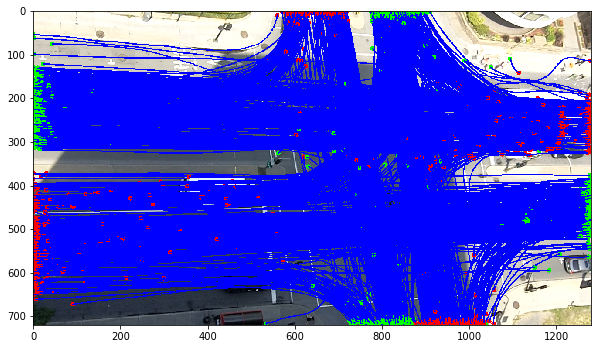

In [10]:
ut.plot_trajectories(FRAME_PATH,pixel_trajectories)

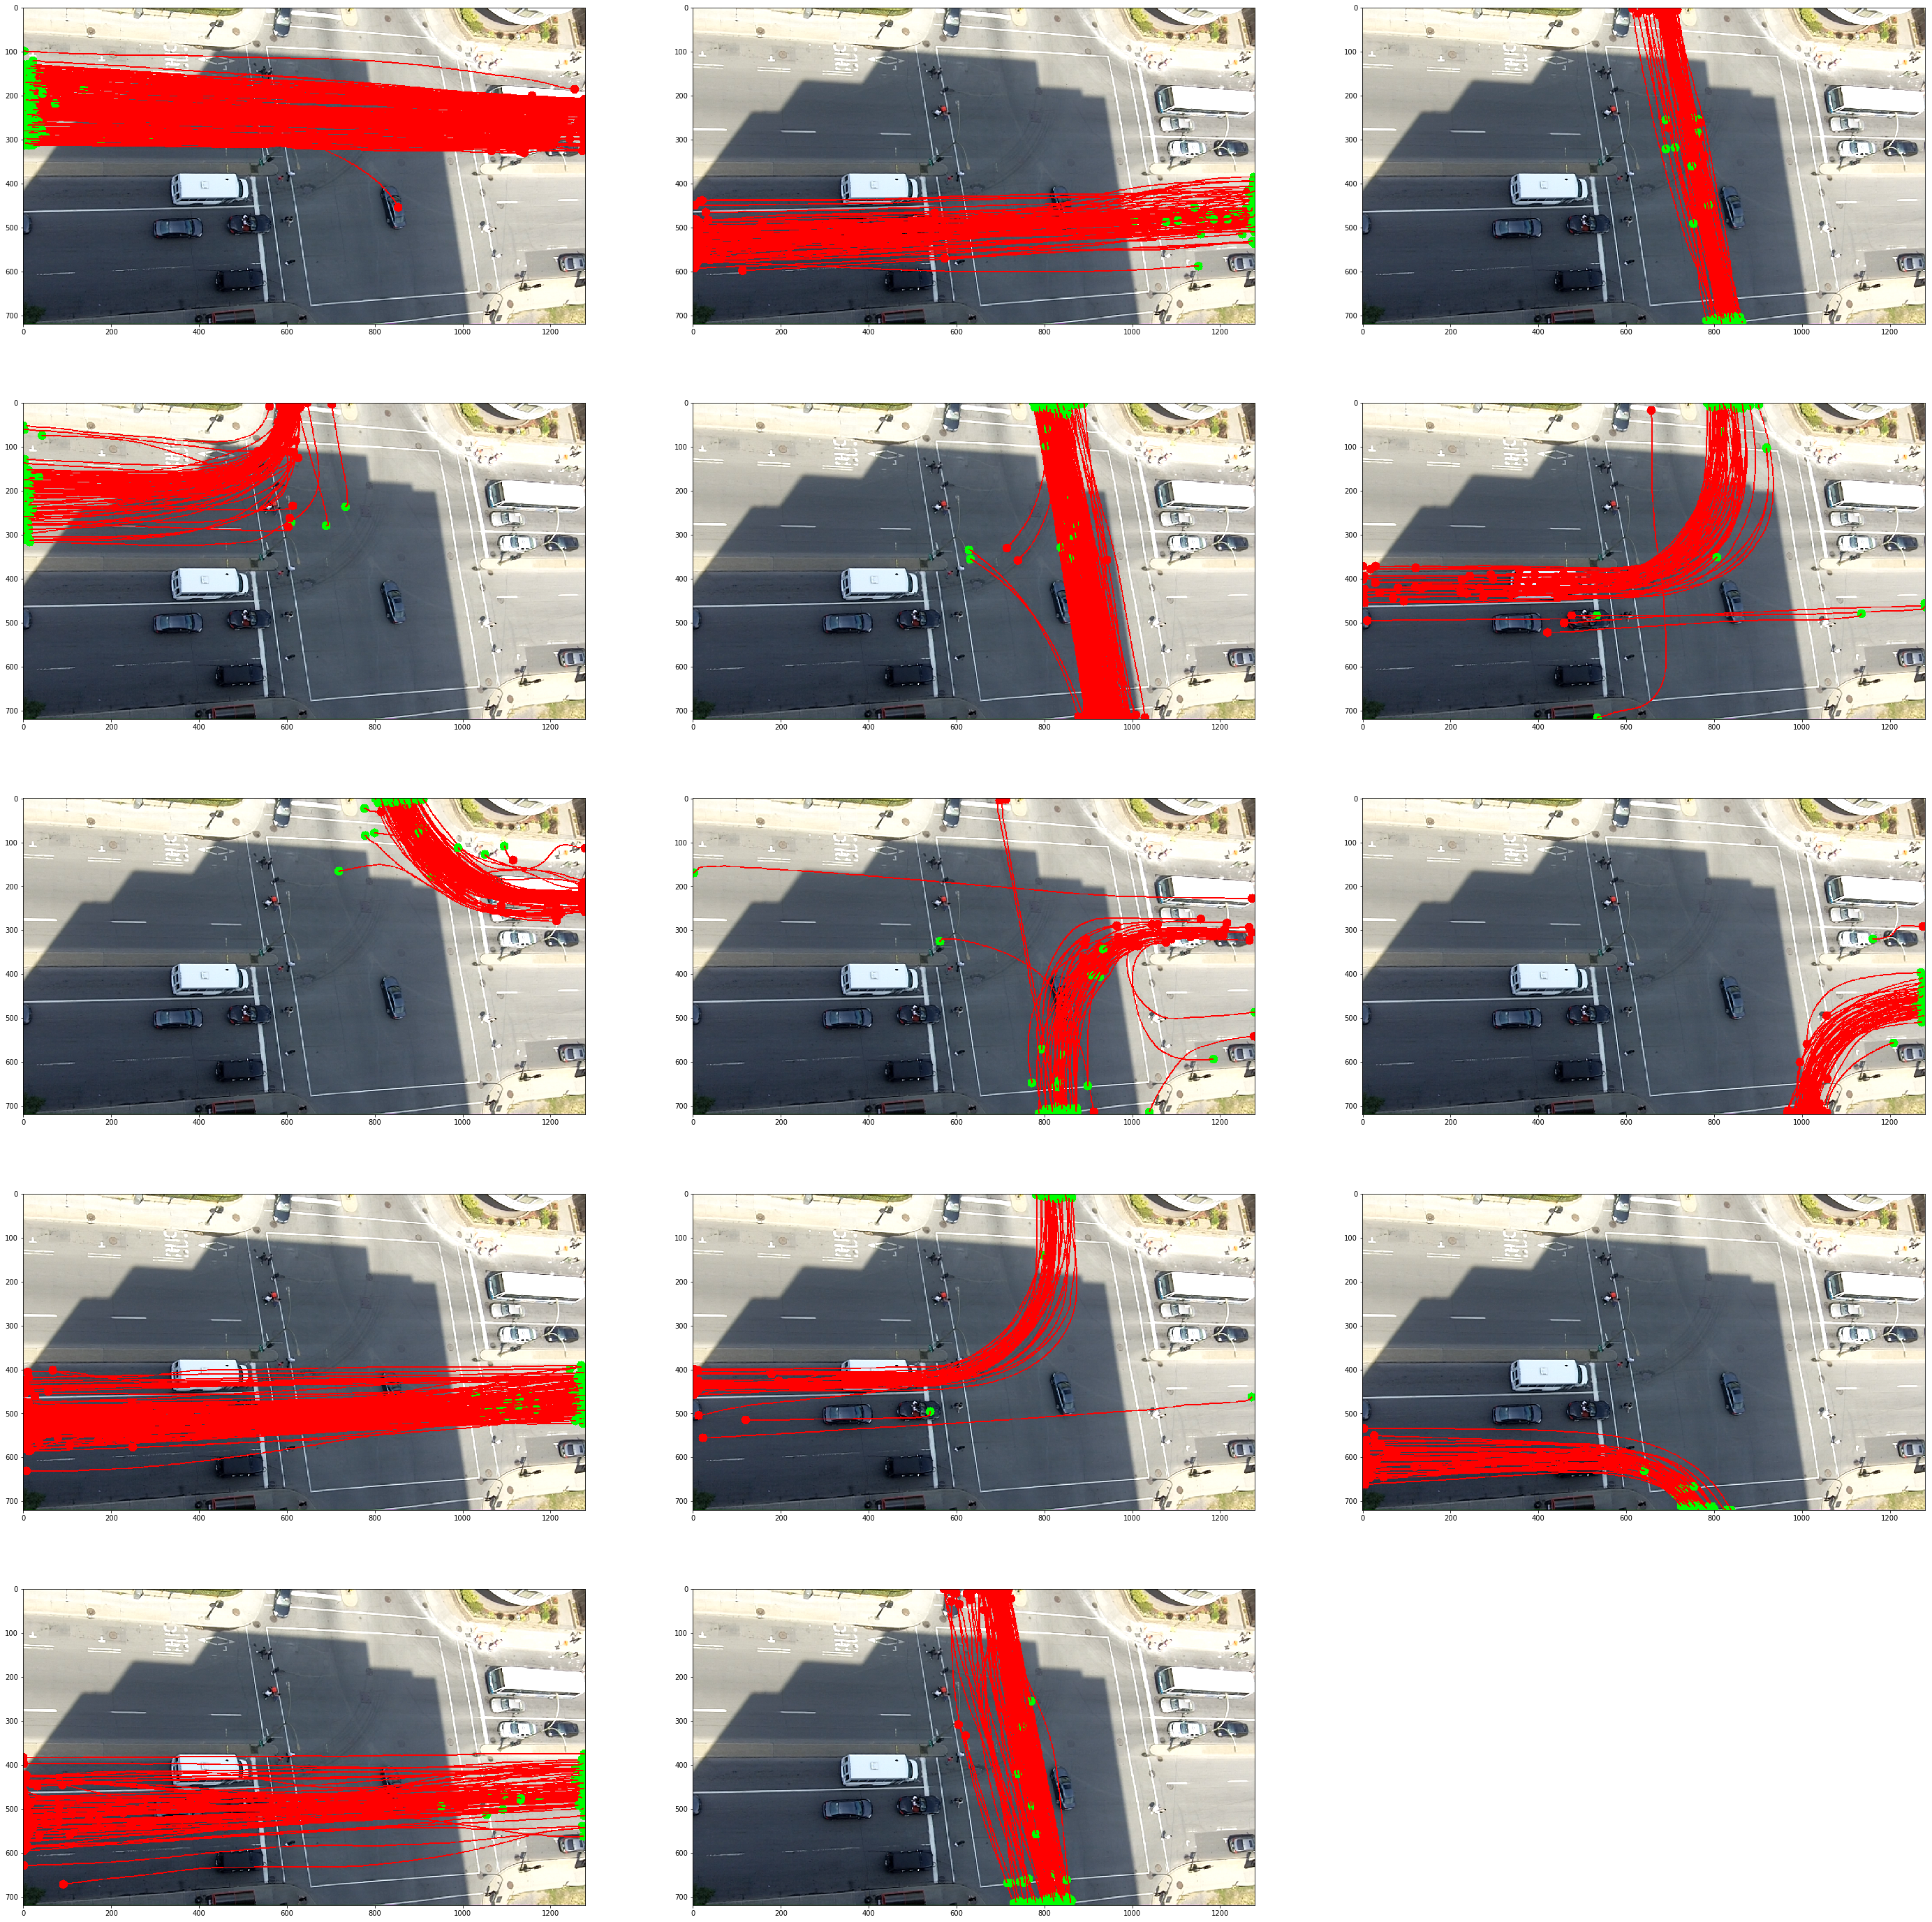

In [11]:
ut.display_clusters_oat_i(clusters,FRAME_PATH,pixel_trajectories)

In [12]:
np.savetxt(SAVE_PATH + "targets.txt",clusters)

In [13]:
np.savetxt(SAVE_PATH + "features.txt",features)

In [14]:
clusters = np.loadtxt(SAVE_PATH + "targets.txt")
clusters = [int(c) for c in clusters]

In [15]:
features = np.loadtxt(SAVE_PATH + "features.txt")